In [205]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures 

from sklearn.metrics import mean_squared_error, r2_score

In [206]:
data=pd.read_csv('/content/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [207]:
data.shape

(21613, 21)

In [208]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [209]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [210]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


#Data preprocessing

In [211]:
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

There is no missing values in the dataset

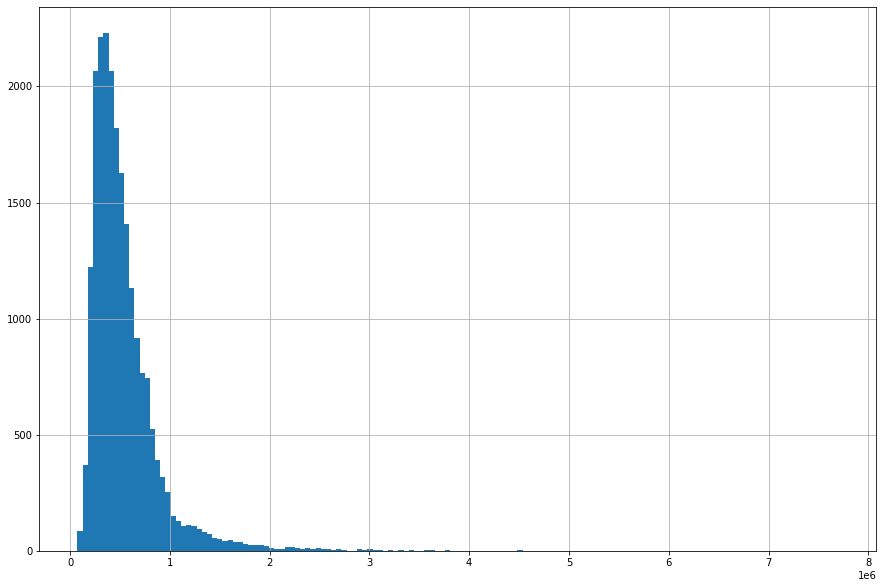

In [212]:
data.price.hist(bins=147,figsize=(15,10))

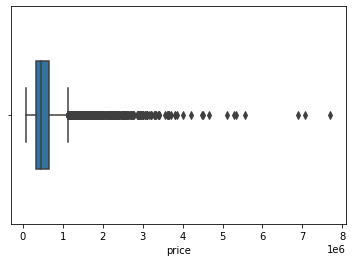

In [213]:
sns.boxplot(x='price',data=data,width=0.5)

In [214]:
print(data.price.mean())
print(data.price.median())
print(data.price.mode()[0])

540088.1417665294
450000.0
350000.0


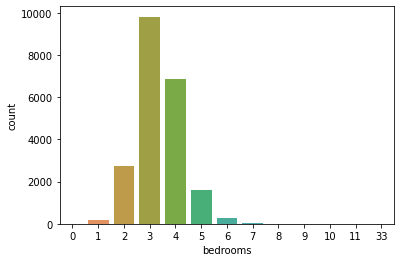

In [215]:
sns.countplot(x='bedrooms',data=data)

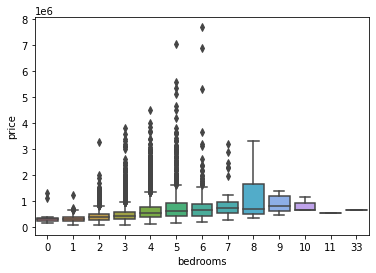

In [216]:
sns.boxplot(x='bedrooms',y='price',data=data)

Houses with more bedrooms doen't mean its price is higher for example houses with 9,10,11 or 33 bedrooms is cheaper than other houses.
we can see that houses with number of bedrooms more than 9 has cheaper price 

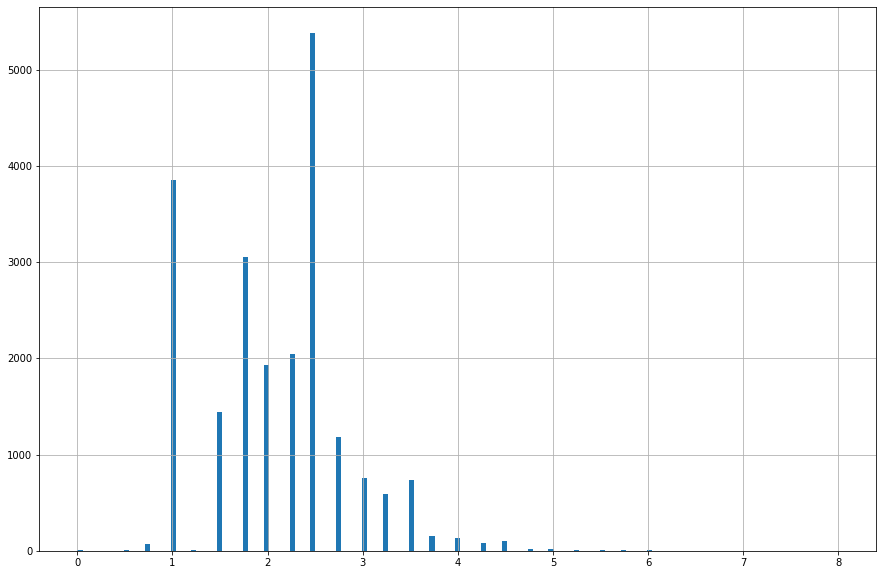

In [217]:
data.bathrooms.hist(bins=147,figsize=(15,10))

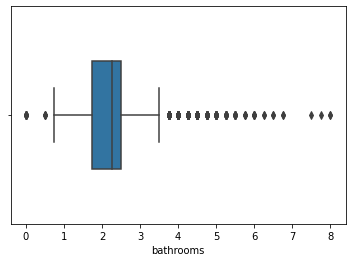

In [218]:
sns.boxplot(x='bathrooms',data=data,width=0.5)

the distribution of bathrooms is right skewed and the most frequent number of bathhrooms/house  is 2.5, we also have outliers on the 2 sides.

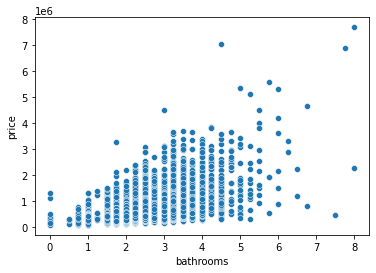

In [219]:
sns.scatterplot(x='bathrooms',y='price',data=data)

when The number of bathrooms per house is high it doesn't mean that the price is high as well.

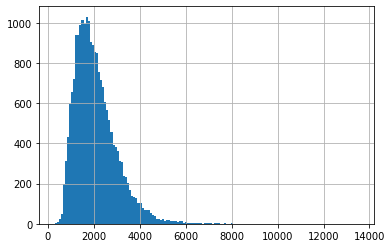

In [220]:
data.sqft_living.hist(bins=147)

In [221]:
print('the most frequent value: ',data.sqft_living.mode()[0])
print('the average value: ',data.sqft_living.mean())

the most frequent value:  1300
the average value:  2079.8997362698374


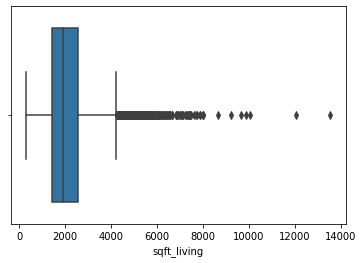

In [222]:
sns.boxplot(x='sqft_living',data=data)

it's a right skewed histogram with the most frequent value of living area space is 1300 sqft and we have upper outliers

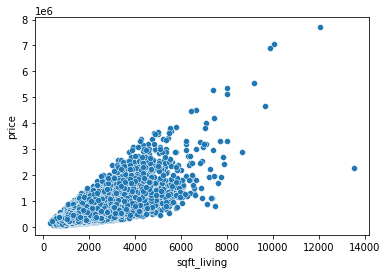

In [223]:
sns.scatterplot(x='sqft_living',y='price',data=data)

In [224]:
data[data['sqft_living']>12000]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.0,12050,27600,2.5,0,3,4,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
12777,1225069038,20140505T000000,2280000.0,7,8.0,13540,307752,3.0,0,4,3,12,9410,4130,1999,0,98053,47.6675,-121.986,4850,217800


The graph shows that these 2 variables have positive linear relashionship : The big the living space is, the higher the price is. But we have also some exceptions for example the house that has the biggest living space(13540 sqft) has lower price(2280000) than other houses.

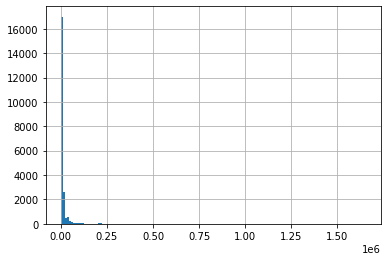

In [225]:
data.sqft_lot.hist(bins=147)

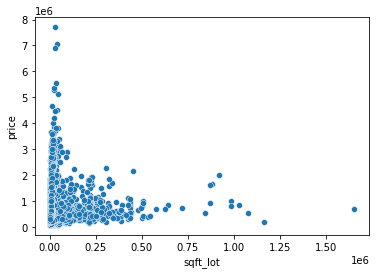

In [226]:
sns.scatterplot(x='sqft_lot',y='price',data=data)

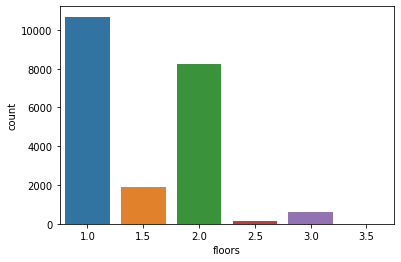

In [227]:
sns.countplot(x='floors',data=data)

Houses with 1 or 2 floors are the most frequent

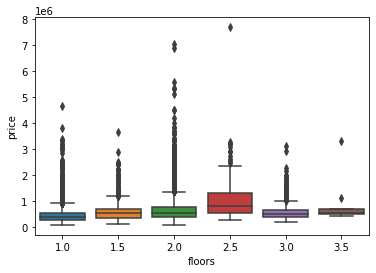

In [228]:
sns.boxplot(x='floors',y='price',data=data)

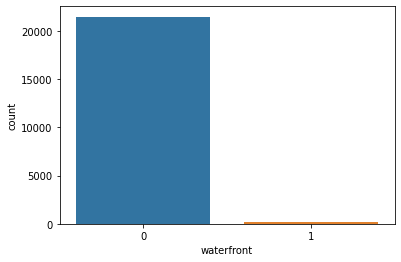

In [229]:
sns.countplot(x='waterfront',data=data)

the majority of houses are without waterfront view

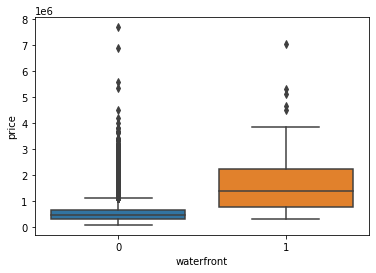

In [230]:
sns.boxplot(x='waterfront',y='price',data=data)

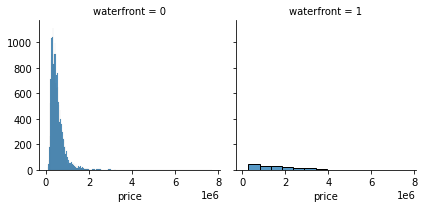

In [231]:
g=sns.FacetGrid(data,col='waterfront')
g.map(sns.histplot,'price')

Houses with waterfront view has higher price but there is exceptions for example the most expensive house has no waterfront view

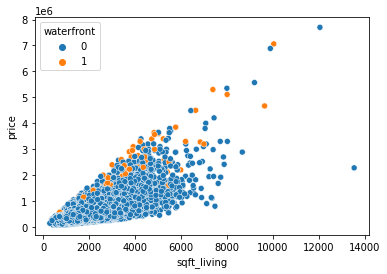

In [232]:
sns.scatterplot(x='sqft_living',y='price',hue='waterfront',data=data)

This distribution show that houses with the same living space are higher in price if they have waterfront view. But we have exceptions as always.

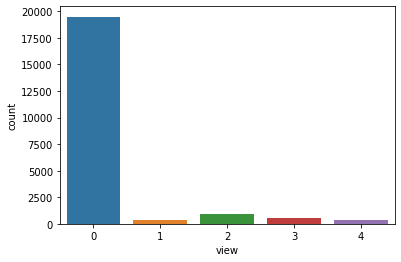

In [233]:
sns.countplot(x='view',data=data)

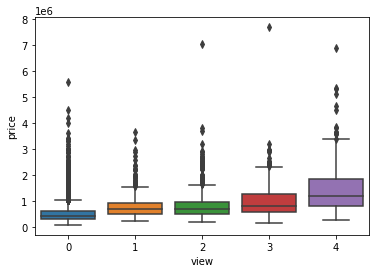

In [234]:
sns.boxplot(x='view',y='price',data=data)

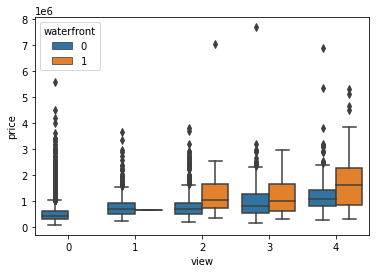

In [235]:
sns.boxplot(x='view',y='price',hue='waterfront',data=data)

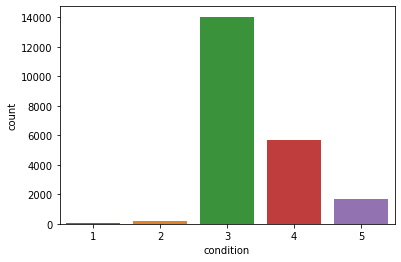

In [236]:
sns.countplot(x='condition',data=data)

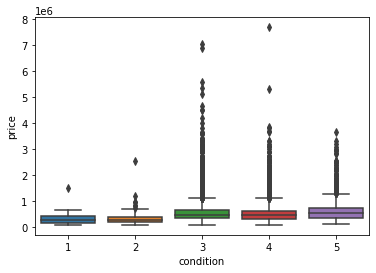

In [237]:
sns.boxplot(x='condition',y='price',data=data)

Houses with conditions 3,4 or 5 has higher prices 

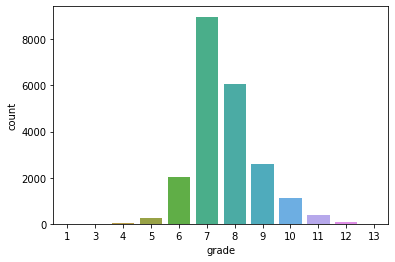

In [238]:
sns.countplot(x='grade',data=data)

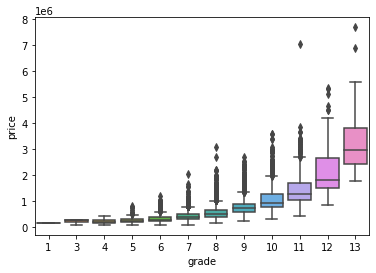

In [239]:
sns.boxplot(x='grade',y='price',data=data)

As expected the price is as high as the grade

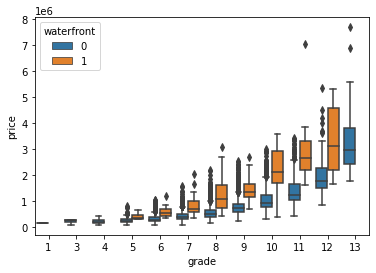

In [240]:
sns.boxplot(x='grade',y='price',hue='waterfront',data=data)

This is explain why the house with no waterfront view is the most expensive because its grade is 13 which means that the house is perfect(building + design)

In [241]:
def plot_correlation_map( df ):

    corr = df.corr()
    s , ax = plt.subplots( figsize =( 30 , 20 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 15 }

        )

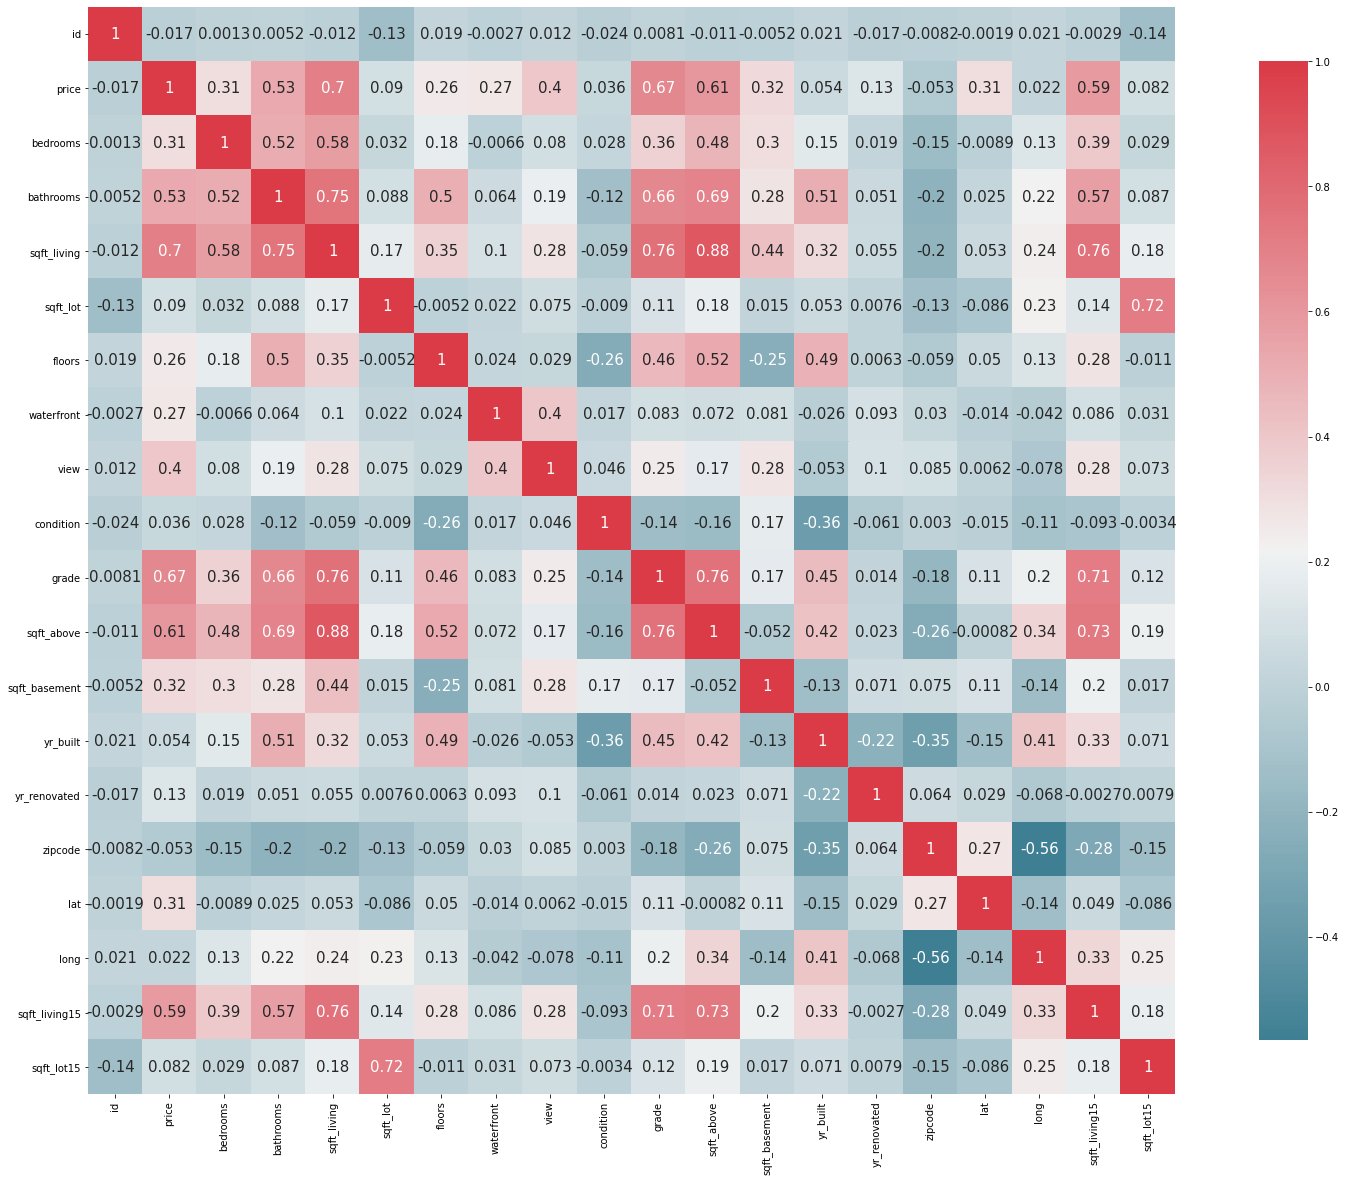

In [242]:
plot_correlation_map( data )



*   sqft_living and grade are highly correlated with the price. 
*   id, sqft_lot, condition, yr_built, yr_renovated, zipcode,long and sqft_lot15 are not correlated with the price 
*   we will eliminate lat and long because zipcode has all the information
*   sqft_living and sqft_above are highly correlated so we have to eliminate one of them 
*   sqft_living15 and sqft_living are highly correlated and sqft_living is the highly corelated one with the price so we will eliminate sqft_living15
*   







#Simple Linear Regression

In [243]:
y=data[['price']]

sqft_living: has some linear relationship with the target that's why we will use for prediction

In [244]:
x=data[['sqft_living']]
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=30,test_size=25)
model=LinearRegression()
model.fit(x_train,y_train)
y_predicted=model.predict(x_test)

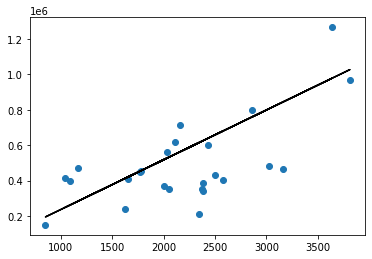

In [245]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_predicted,color='k')
plt.show()

In [246]:
print('MSE: ',mean_squared_error(y_test,y_predicted))
print('R squared: ', r2_score(y_test,y_predicted))

MSE:  41293574988.203606
R squared:  0.25523128692326247


#Multi-Linear Regression

In [247]:
# using subset of the most important features
X=data[['bedrooms','bathrooms','sqft_living','sqft_lot','floors', 'waterfront', 'view', 'condition', 'grade','zipcode']]
X_train,X_test,y_train,y_test= train_test_split(X,y,random_state=30,test_size=25)
model=LinearRegression()
model.fit(X_train,y_train)
y_predicted=model.predict(X_test)
print('MSE: ',mean_squared_error(y_test,y_predicted))
print('R squared: ', r2_score(y_test,y_predicted))

MSE:  30026807496.80288
R squared:  0.4584381036617611


In [248]:
#Using all the features
X1=data.iloc[:,3:].values
X1_train,X1_test,y_train,y_test= train_test_split(X1,y,random_state=30,test_size=25)
model=LinearRegression()
model.fit(X1_train,y_train)
y_predicted=model.predict(X1_test)
print('MSE: ',mean_squared_error(y_test,y_predicted))
print('R squared: ', r2_score(y_test,y_predicted))

MSE:  14126707314.386005
R squared:  0.74521146135803




*   comparing R-squared measure, we can see that the multi-linear model is considerably more accurate than simple linear model. Because the multi-linear model learn from more than 1 variable which is considerably more complex than the simple linear model because there are more features that controls the price of the house other than sqft_living variable such as grade 
*   we fed to the multi_linear algorithm 2 kind of features : one of them contains all the variables and the other one has subset of the features(most important one) but we find out that the second model(with all the variables) has a better performance than the first one, maybe the model has found more hidden patterns that has a relation with the price.



#Polynomial Regression

In [249]:
# using subset of the most important features
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

X_train_fit = poly.fit_transform(X_train) #transforming our input data
lg.fit(X_train_fit, y_train)
X_test_ = poly.fit_transform(X_test)
predicted = lg.predict(X_test_)

print("MSE: ", mean_squared_error(y_test, predicted))
print("R squared: ", r2_score(y_test,predicted))

MSE:  22311321403.90321
R squared:  0.5975941987640111


In [250]:
#Using all the features
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)

X1_train_fit = poly.fit_transform(X1_train) 
lg.fit(X1_train_fit, y_train)
X1_test_ = poly.fit_transform(X1_test)
predicted = lg.predict(X1_test_)

print("MSE: ", mean_squared_error(y_test, predicted))
print("R squared: ", r2_score(y_test,predicted))

MSE:  11834946301.176067
R squared:  0.7865455405937318


 

*  R2_LR < R2_MLR < R2_PR : the performance of the polinomial regression is better tan the other 2 algorithm because it's the most complicated one and because the straight line of the other models is unable to capture some patterns in the data.

*  we fed to the polinomial algorithm 2 kind of features : one of them contains all the variables and the other one has subset of the features(most important one) but we find out that the second model(with all the variables) has a better performance than the first one, maybe the model has found more hidden patterns that has a relation with the price.


